In [ ]:
# 这是一个示例 Python 脚本。
import datetime

# 按 ⌃R 执行或将其替换为您的代码。
# 按 双击 ⇧ 在所有地方搜索类、文件、工具窗口、操作和设置。
import pandas as pd
import os as os

/Users/tony/miniconda3/envs/roadster/lib/python3.9/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


Starting Portfolio Value: 100000.00
2023-01-25: BUY CREATE: price=0.08288, rsi=19.734685561957335
Buy order executed at 0.08291
2023-01-28: SELL CREATE: price=0.09066, rsi=72.3146111147048
Sell order executed at 0.09061
2023-01-30: BUY CREATE: price=0.08575, rsi=26.908024428359283
Buy order executed at 0.08575
2023-02-05: SELL CREATE: price=0.09745, rsi=71.94969461054808
Sell order executed at 0.09738
2023-02-07: BUY CREATE: price=0.08917, rsi=29.111461698256903
Buy order executed at 0.08918
2023-02-12: SELL CREATE: price=0.08556, rsi=79.86612101265645
Sell order executed at 0.08554
2023-02-24: BUY CREATE: price=0.08178, rsi=22.941991318999044
Buy order executed at 0.0818
2023-03-10: SELL CREATE STOP LOSS: price=0.06433, rsi=12.558314087997587
Sell order executed at 0.06433
2023-03-10: BUY CREATE: price=0.06591, rsi=25.982391720765577
Buy order executed at 0.06588
2023-03-13: SELL CREATE: price=0.06764, rsi=70.87116558635118
Sell order executed at 0.06765
2023-03-15: BUY CREATE: price=

/Users/tony/miniconda3/envs/roadster/lib/python3.9/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28.588%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2023-01-01
End date,2024-12-03
Total months,33
,Backtest
Annual return,28.588%
Cumulative returns,101.668%
Annual volatility,20.606%
Sharpe ratio,1.32
Calmar ratio,1.95
Stability,0.91
Max drawdown,-14.67%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.67,2023-02-07,2023-03-11,2023-06-30,104
1,14.44,2024-04-12,2024-06-18,2024-07-26,76
2,12.05,2023-08-14,2023-10-12,2023-11-25,75
3,8.66,2024-07-31,2024-08-05,2024-08-12,9
4,7.17,2023-12-27,2024-01-09,2024-01-14,13


/Users/tony/miniconda3/envs/roadster/lib/python3.9/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


Stress Events,mean,min,max
Covid,0.11%,-5.91%,10.03%


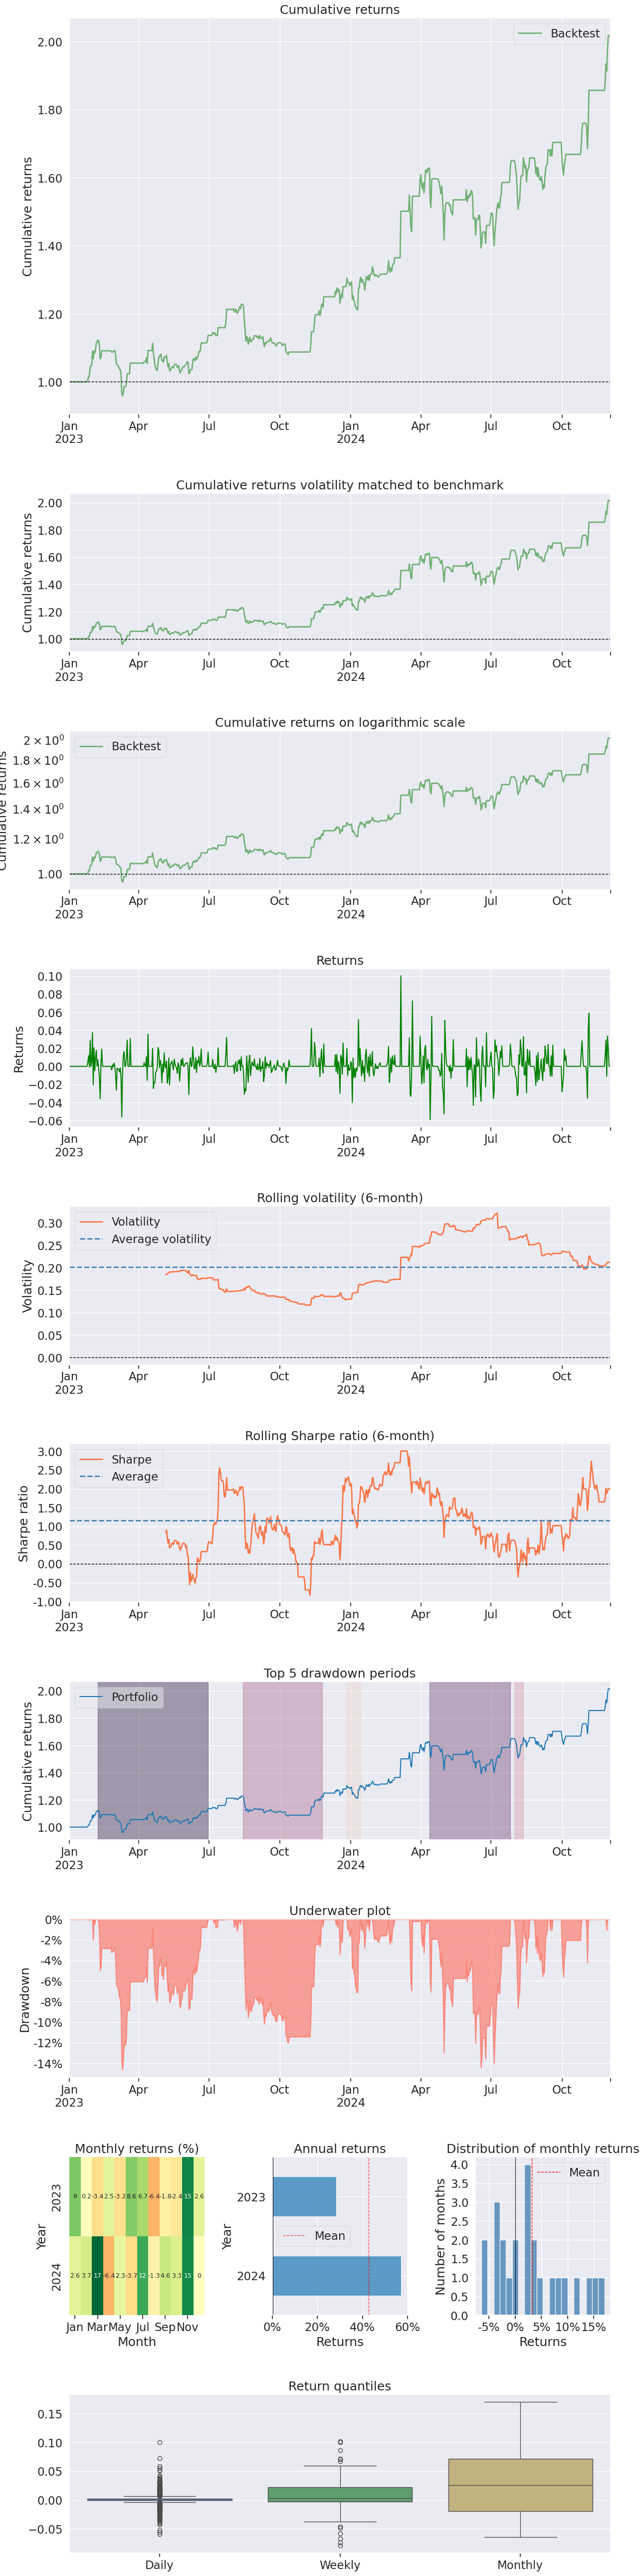

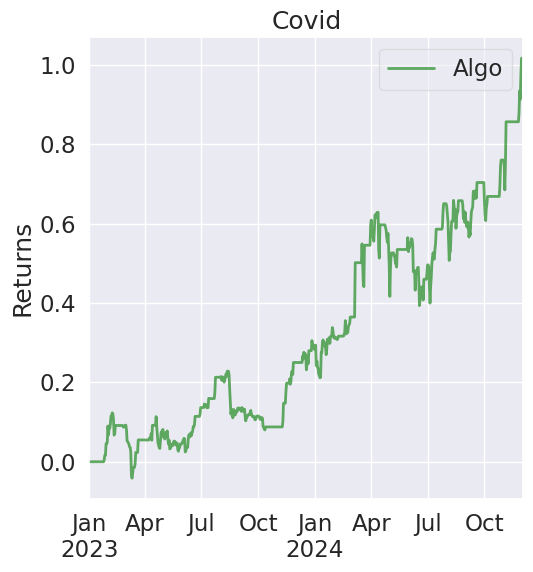

In [ ]:
# import matplotlib
# matplotlib.use('TkAgg')
import backtrader as bt
import backtrader.feeds as btfeeds
from strategy.ma import SimpleMAStrategy
from strategy.ap import SimpleAPStrategy
from strategy.rsi import SimpleRSIStrategy
from strategy.boll import SimpleBollingerStrategy
from strategy.threema import ThreeMAStrategy
from data.ext import ExtendedCSVData
import pyfolio as pf


def print_hi(name):
    # 在下面的代码行中使用断点来调试脚本。
    print(f'Hi, {name}')  # 按 ⌘F8 切换断点。


def trade():
    # data = ExtendedCSVData(
    #     dataname='his.csv',
    #     fromdate=datetime.datetime(2024, 10,8 ),
    #     todate=datetime.datetime(2024, 11, 8),
    #     dtformat=('%Y-%m-%d %H:%M:%S'),
    #     tmformat=('%H.%M.%S'),
    #     nullvalue=0.0,
    #     timeframe=bt.TimeFrame.Minutes,
    #
    #     datetime=0,
    #     time=-1,
    #     high=3,
    #     low=4,
    #     open=1,
    #     close=2,
    #     volume=7,
    #     turnover=8,
    # )

    data = ExtendedCSVData(
        dataname='doge_usdt_30min_formated.csv',
        fromdate=datetime.datetime(2023, 1, 1),
        todate=datetime.datetime(2024, 12, 31),
        dtformat=('%Y-%m-%d %H:%M:%S'),
        tmformat=('%H.%M'),
        nullvalue=0.0,
        timeframe=bt.TimeFrame.Minutes,

        datetime=0,
        time=-1,
        high=2,
        low=3,
        open=1,
        close=4,
        volume=5,
        turnover=6,
    )

    cerebro = bt.Cerebro()
    cerebro.adddata(data)
    cerebro.addstrategy(SimpleRSIStrategy, stop_loss_percent=0.2,take_profit_percent=0.2)

    # cerebro.optstrategy(SimpleAPStrategy,
    #                     stop_loss_percent=[0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3],
    #                     take_profit_percent=[0.03, 0.04, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.5, 0.7])
    # cerebro.optstrategy(SimpleAPStrategy, period=[1050])
    # cerebro.addsizer(bt.sizers.FixedSize, stake=200000)
    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(0.001)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.addanalyzer(bt.analyzers.PyFolio)

    # cerebro.addanalyzer(bt.analyzers.DrawDown, _name="_DrawDown")
    # cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name="_AnnualReturn")
    # cerebro.addanalyzer(bt.analyzers.Returns, _name="_Returns", tann=252, timeframe=bt.TimeFrame.Minutes)

    results = cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    strat = results[0]

    # for result in results:
    #     for strategy in result:
    #         print(
    #             f'stop_loss_percent: {strategy.params.stop_loss_percent},take_profit_percent: {strategy.params.take_profit_percent}, Final Value: {cerebro.broker.getvalue()}')
    #         print(f"收益率：{strategy.analyzers._Returns.get_analysis()['rtot'] * 100}%")
    #         print(f"最大回撤：{strategy.analyzers._DrawDown.get_analysis()['max']['drawdown']}%")
    pyfoliozer = strat.analyzers.getbyname('pyfolio')
    returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
    # %matplotlib inline
    # returns = pd.Series(strat.analyzers.returns.get_analysis()['rtot'], index=strat.data.datetime.get())
    pf.create_full_tear_sheet(
        returns,
        # positions=positions,
        # transactions=transactions,
        # live_start_date='2022-01-01',  # This date is sample specific
    )
    # cerebro.plot(style='candlestick',
    #         plotstyle = 'bar',  # 选择绘图样式
    #         figscale = 1.5,  # 增大图表比例
    #         barup = 'green',  # 上涨 K 线颜色
    #         bardown = 'red',  # 下跌 K 线颜色
    #         volume = True)

    # 按装订区域中的绿色按钮以运行脚本。

trade()